<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax


In [ ]:

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import pandas
import pandas as pd

# Define the file URL
file_url = 'https://drive.google.com/uc?id=14-F1kc-3s3pW_L0zpG0CQnk1ftair17g'

# Read the CSV file
data = pd.read_csv(file_url)

# Display the first few rows of the data
data.head()


Mounted at /content/drive


,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [ ]:
#data = pd.read_csv('data_for_lr.csv')

# Drop the missing values
data = data.dropna()

# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)


Build the Linear Regression Model

Steps:

In forward propagation, Linear regression function Y=mx+x is applied by initially assigning random value of parameter (m & c).

The we have written the function to finding the cost function i.e the mean

In [ ]:
class LinearRegression:
	def __init__(self):
		self.parameters = {}

	def forward_propagation(self, train_input):
		m = self.parameters['m']
		c = self.parameters['c']
		predictions = np.multiply(m, train_input) + c
		return predictions

	def cost_function(self, predictions, train_output):
		cost = np.mean((train_output - predictions) ** 2)
		return cost

	def backward_propagation(self, train_input, train_output, predictions):
		derivatives = {}
		df = (train_output - predictions) * -1
		dm = np.mean(np.multiply(train_input, df))
		dc = np.mean(df)
		derivatives['dm'] = dm
		derivatives['dc'] = dc
		return derivatives

	def update_parameters(self, derivatives, learning_rate):
		self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
		self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

	def train(self, train_input, train_output, learning_rate, iters):
		#initialize random parameters
		self.parameters['m'] = np.random.uniform(0,1) * -1
		self.parameters['c'] = np.random.uniform(0,1) * -1

		#initialize loss
		self.loss = []

		#iterate
		for i in range(iters):
			#forward propagation
			predictions = self.forward_propagation(train_input)

			#cost function
			cost = self.cost_function(predictions, train_output)

			#append loss and print
			self.loss.append(cost)
			print("Iteration = {}, Loss = {}".format(i+1, cost))

			#back propagation
			derivatives = self.backward_propagation(train_input, train_output, predictions)

			#update parameters
			self.update_parameters(derivatives, learning_rate)

		return self.parameters, self.loss


In [ ]:
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)


Iteration = 1, Loss = 10632.473764649221
Iteration = 2, Loss = 4828.241243834023
Iteration = 3, Loss = 2194.8545199482005
Iteration = 4, Loss = 1000.0840462887315
Iteration = 5, Loss = 458.0153588276197
Iteration = 6, Loss = 212.07819472411038
Iteration = 7, Loss = 100.49623077543484
Iteration = 8, Loss = 49.87136995437382
Iteration = 9, Loss = 26.90281434092035
Iteration = 10, Loss = 16.48195503343128
Iteration = 11, Loss = 11.753999438313118
Iteration = 12, Loss = 9.608920563201739
Iteration = 13, Loss = 8.635695716867426
Iteration = 14, Loss = 8.194142341392395
Iteration = 15, Loss = 7.993808901156774
Iteration = 16, Loss = 7.902917212733705
Iteration = 17, Loss = 7.861679368339494
Iteration = 18, Loss = 7.842969527989124
Iteration = 19, Loss = 7.834480668035693
Iteration = 20, Loss = 7.8306290782188315


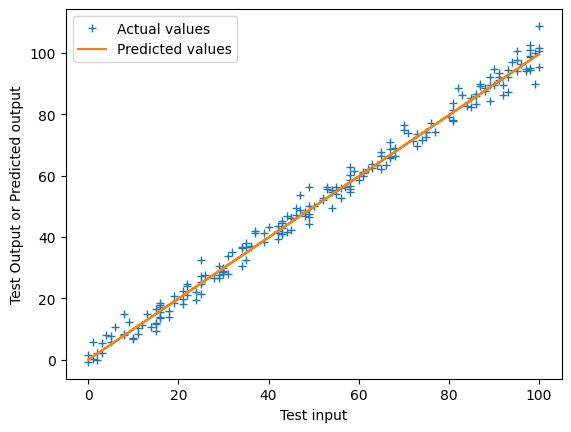

In [ ]:
#Prediction on test data
y_pred = test_input*parameters['m'] + parameters['c']

# Plot the regression line with actual data pointa
plt.plot(test_input, test_output, '+', label='Actual values')
plt.plot(test_input, y_pred, label='Predicted values')
plt.xlabel('Test input')
plt.ylabel('Test Output or Predicted output')
plt.legend()
plt.show()
